# Assignment 1

In [1]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def read_FAST_A(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = read_FAST_A('lambda_virus.fa')
print(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

# Question 1
What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?

In [2]:
count = 0
count = count + len(naive('AGGT', genome))
count = count + len(naive(reverseComplement('AGGT'), genome))
print(count)

306


# Question 2
How many times does TTAA or its reverse complement occur in the labda virus genome?
Hint: TTAA and its reverse complement are equal, so remember to not double count

In [4]:
count = 0
count = count + len(naive('TTAA', genome))

newCount = 0
newCount = newCount + len(naive(reverseComplement('TTAA'), genome))

print(count)
print(newCount)

195
195


# Question 3
What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [7]:
findGenome = 'ACTAAGT'

offset1 = genome.rfind(findGenome)
offset2 = genome.rfind(reverseComplement(findGenome))

print('offset1: %d    offset2: %d' % (offset1, offset2))
print("Report = ", min(offset1, offset2))

offset1: 45382    offset2: 26028
Report =  26028


# Question 4
What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?

In [9]:
findGenome = 'AGTCGA'

offset1 = genome.find(findGenome)
offset2 = genome.find(reverseComplement(findGenome))

print('offset1: %d    offset2: %d' % (offset1, offset2))
print("Report = ", min(offset1, offset2))

offset1: 18005    offset2: 450
Report =  450


# Question 5
As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].

In [10]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        
        mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch += 1
                if mismatch > 2:
                    break
        
        if mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    
    return occurrences

naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [12]:
print(len(naive_2mm('TTCAAGCC', genome)))

191


# Question 6
What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [13]:
offsets = naive_2mm('AGGAGGTT', genome)
print(offsets[0])

49


# Question 7
Finally, download and parse the provided FASTQ file containing real DNA sequencing reads
derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.
The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
to a particular offset in all the reads. For example, if the leftmost read position seems
to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
report 3. Do whatever analysis you think is needed to identify the bad cycle.
It might help to review the "Analyzing reads by position" video.

In [14]:
def read_FAST_Q(filename):
    
    sequences = []
    qualities = []
    
    with open(filename, 'r') as f:
        while True:
            
            f.readline()
            seq = f.readline().rstrip()
            
            f.readline()
            qual = f.readline().rstrip()
            
            if len(seq) == 0:
                break
            
            sequences.append(seq)
            qualities.append(qual)
    
    return sequences, qualities

In [15]:
seq, qual = read_FAST_Q('ERR037900_1.first1000.fastq')
print(seq[:5])
print(qual[:5])
print(len(seq[0]))

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFH

In [16]:
def QtoPhred33(Q):
    '''Turn Q into Phred+33 ASCII-­‐encoded quality'''
    return chr(Q + 33) # converts character to integer according to ASCII table

def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual) - 33 # converts integer to character according to ASCII table

def createHistory(qualities):
    history = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            history[q] += 1
    return history

h = createHistory(qual)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


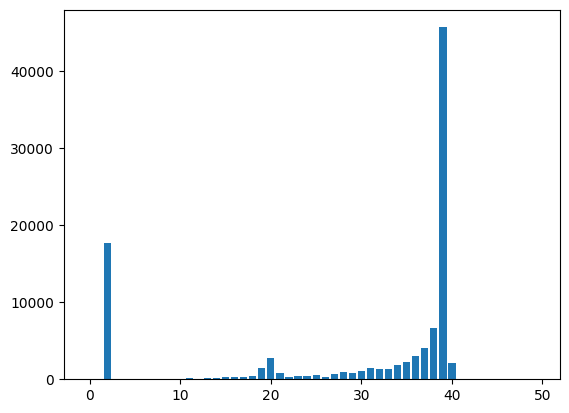

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()